In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
%matplotlib inline

In [ ]:
data = pd.read_csv('PHASEdata.csv',header=None, skiprows=1)
z = data[0]
#print(z)
z_approach = z[:500]
z_retract = z[500:]
#print(z_approach)
#print(z_retract)

#phase shift
pslist = []
for k in range(len(z)):
    phaseshift = data.iloc[k,1:]  #[from zero row to the end row, from second column to the last column]
    #print(phaseshift)
    ps = np.array(phaseshift)
    ps_reshape = np.reshape(ps,(48,48))
    pslist.append(ps_reshape)
#print(pslist)

In [ ]:
a = np.linspace(0, 47, 48)
b = np.linspace(0, 47, 48)
c = z_approach
x, z, y = np.meshgrid(a, c, b)

#phaseshift information as intensity case
psasas = []
for k in range(len(c)):
    C = pslist[k]
    for i in range(len(a)):
        B = pslist[k][i]
        for j in range(len(b)):
            A = pslist[k][i][j]
            psasas.append(A)
l = psasas

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=l, alpha=0.4)
ax.set_xlabel('X(nm)', fontsize=15)
ax.set_ylabel('Y(nm)', fontsize=15)
ax.set_zlabel('Z(nm)', fontsize=15)
ax.set_title('3D Plot for the AFM Phase Shift of XXX', fontsize=20)
plt.show()

### Z Axis Slicing:

In [ ]:
k = 250
a = np.linspace(0, 47, 48)
b = np.linspace(0, 47, 48)
c = z_approach[k]
x, z, y = np.meshgrid(a, c, b)

#phaseshift information as intensity case
psasas = []
for i in range(len(a)):
    for j in range(len(b)):
        C = pslist[k][i][j]
        psasas.append(C)
l = psasas

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=l, alpha=0.4)
ax.set_zlim(top=2, bottom=0)
ax.set_xlabel('X(pm)', fontsize=15)
ax.set_ylabel('Y(pm)', fontsize=15)
ax.set_zlabel('Z(pm)', fontsize=15)
ax.set_title('Z Axis Slicing for the AFM Phase Shift of XXX', fontsize=20)
plt.show()

### Y Axis Slicing:

In [ ]:
i = 10
a = np.linspace(0, 47, 48)
b = np.linspace(0, 47, 48)[i]
c = z_approach
x, z, y = np.meshgrid(a, c, b)

psasas = []
for k in range(len(c)):
    for j in range(len(a)):
        A = (pd.DataFrame(pslist[k]).iloc[i])[j]
        psasas.append(A)
l = psasas

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=l, alpha=0.4)
ax.set_ylim(top=48, bottom=0)
ax.set_xlabel('X(nm)', fontsize=15)
ax.set_ylabel('Y(nm)', fontsize=15)
ax.set_zlabel('Z(nm)', fontsize=15)
ax.set_title('Y Slicing Plot for the AFM Phase Shift of XXX', fontsize=20)
plt.show()

### X Axis Slicing:

In [ ]:
j = 24
a = np.linspace(0, 47, 48)[j]
b = np.linspace(0, 47, 48)
c = z_approach
x, z, y = np.meshgrid(a, c, b)

psasas = []
for k in range(len(c)):
    for i in range(len(b)):
        B = (pd.DataFrame(pslist[k]).transpose().iloc[j])[i]
        psasas.append(B)
l = psasas

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=l, alpha=0.4)
ax.set_xlim(left=0, right=48)
ax.set_xlabel('X(nm)', fontsize=15)
ax.set_ylabel('Y(nm)', fontsize=15)
ax.set_zlabel('Z(nm)', fontsize=15)
ax.set_title('X Slicing Plot for the AFM Phase Shift of XXX', fontsize=20)
plt.show()

### Animation:

<IPython.core.display.Javascript object>


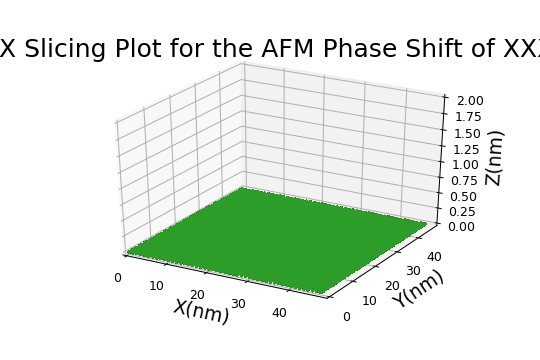

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator
%matplotlib notebook

# ---------------------------------------------------------------------------------------------------------------
data = pd.read_csv('PHASEdata.csv', header=None, skiprows=1)
z = data[0]
# print(z)
z_approach = z[:500]
z_retract = z[500:]
# print(z_approach)
# print(z_retract)

# phase shift
pslist = []
for k in range(len(z)):
    phaseshift = data.iloc[k, 1:]  # [from zero row to the end row, from second column to the last column]
    # print(phaseshift)
    ps = np.array(phaseshift)
    ps_reshape = np.reshape(ps, (48, 48))
    pslist.append(ps_reshape)
# print(pslist)
# ----------------------------------------------------------------------------------------------------------------

for i in range(0, 48):
    a = np.linspace(0, 47, 48)[i]
    b = np.linspace(0, 47, 48)
    c = z_approach
    x, z, y = np.meshgrid(a, c, b)

# Set up plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(left=0, right=48)
ax.set_ylim(top=48, bottom=0)
ax.set_zlim(bottom=0, top=2)
ax.set_xlabel('X(nm)', fontsize=15)
ax.set_ylabel('Y(nm)', fontsize=15)
ax.set_zlabel('Z(nm)', fontsize=15)
ax.set_title('X Slicing Plot for the AFM Phase Shift of XXX', fontsize=20)


# Animation function
def animate(i):
    ann = []
    for w in range(0, 48):
        a = np.linspace(0, 47, 48)[w]
        ann.append(a)
        b = np.linspace(0, 47, 48)
        c = z_approach
        x, z, y = np.meshgrid(ann, c, b)

    cont = plt.scatter(x, y, z, alpha=0.4)

    return cont


anim = animation.FuncAnimation(fig, animate, interval=1, blit=True)
plt.show()

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator
%matplotlib inline

ann = []
for i in range(0, 48):
    a = np.linspace(0, 47, 48)[i]
    ann.append(a)
    b = np.linspace(0, 47, 48)
    c = z_approach
    x, z, y = np.meshgrid(ann, c, b)